In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import itertools

In [3]:
method="integrated_gradients"

In [4]:
load_file_path_fashion=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion', 'Copy of fashion_result.csv')
print(load_file_path_fashion)

load_file_path_svhn=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/SVHN', 'Copy of SVHN_result.csv')
print(load_file_path_svhn)

load_file_path_mnist=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Mnist', 'Copy of Mnist_result.csv')
print(load_file_path_mnist)

load_file_path_gtsrb=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/GTSRB', 'Copy of GTSRB_result.csv')
print(load_file_path_gtsrb)

load_file_path_fashion=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion', 'fashion ig ave var.csv')
print(load_file_path_fashion)

load_file_path_svhn=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/SVHN', 'SVHN ig ave var.csv')
print(load_file_path_svhn)

load_file_path_mnist=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Mnist', 'mnist ig ave var.csv')
print(load_file_path_mnist)

load_file_path_gtsrb=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/GTSRB/processed data', 'GTSRB ig ave var.csv')
print(load_file_path_gtsrb)

save_folder='/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Analysis'

/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion/Copy of fashion_result.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/SVHN/Copy of SVHN_result.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Mnist/Copy of Mnist_result.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/GTSRB/Copy of GTSRB_result.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion/fashion ig ave var.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/SVHN/SVHN ig ave var.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Mnist/mnist ig ave var.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/GTSRB/processed data/GTSRB ig ave var.csv


# Hyperparameter anaylsis evaluation on all experiments

In [5]:
def combine_csv_files(file_paths):
    """
    Combine multiple CSV files into a single DataFrame, with an additional column indicating the source file.

    Parameters:
    file_paths (list of str): List of file paths to the CSV files.

    Returns:
    pandas.DataFrame: Combined DataFrame with an additional 'source' column.
    """
    combined_df = pd.DataFrame()

    for file in file_paths:
        # Read each CSV file
        df = pd.read_csv(file_paths[file])

        # Add a new column indicating the source file
        df['source'] = file

        # Append to the combined DataFrame
        combined_df = combined_df.append(df, ignore_index=True)

    return combined_df

file_paths = {'fashion':load_file_path_fashion,'svhn':load_file_path_svhn,'mnist':load_file_path_mnist, 'gtsrb':load_file_path_gtsrb}
combined_df = combine_csv_files(file_paths)

<ipython-input-5-eed506c063ef>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-5-eed506c063ef>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-5-eed506c063ef>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-5-eed506c063ef>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)


In [6]:
combined_df.to_csv(save_folder+"/all naive inception ave var result.csv")
combined_df

,Unnamed: 0,initial_lr,optimizer,criterion,train_data_used,train_set_shuffle,train_batch_size,norm_conv1x1,norm_conv1x1_3x3,norm_conv1x1_5x5,...,conv1x1FLOPS,conv1x1_3x3FLOPS,conv1x1_5x5FLOPS,totalFLOPS,final_test_accuracy,source,train accuracy epoch1,train accuracy epoch2,test accuracy epoch1,test accuracy epoch2
0,0,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,16,0.416394,0.175743,0.407863,...,0.012544,0.909,2.515,13.274,85.513333,fashion,NaN,NaN,NaN,NaN
1,1,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,32,0.417140,0.212486,0.370374,...,0.012544,0.909,2.515,13.274,84.959333,fashion,NaN,NaN,NaN,NaN
2,2,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,64,0.425429,0.234686,0.339886,...,0.012544,0.909,2.515,13.274,84.261333,fashion,NaN,NaN,NaN,NaN
3,3,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,16,0.400063,0.181994,0.417943,...,0.012544,0.909,2.515,13.274,85.304000,fashion,NaN,NaN,NaN,NaN
4,4,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,32,0.403714,0.207015,0.389271,...,0.012544,0.909,2.515,13.274,85.282667,fashion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,10,0.0007,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,32,0.083144,0.340693,0.576163,...,0.049152,1.204,3.301,17.927,80.340459,gtsrb,91.033534,93.877127,79.392452,80.340459
57,11,0.0007,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,64,0.099796,0.316444,0.583761,...,0.049152,1.204,3.301,17.927,80.739509,gtsrb,90.622873,94.072573,78.929005,80.739509
58,15,0.0010,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,16,0.119923,0.417129,0.462948,...,0.049152,1.204,3.301,17.927,79.006070,gtsrb,87.458959,90.489990,76.918976,79.006070
59,16,0.0010,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,32,0.092509,0.398220,0.509272,...,0.049152,1.204,3.301,17.927,79.652679,gtsrb,89.598098,92.459960,79.007126,79.652679


# Graph

In [7]:
def plot_variance_for_multiple_hyperparam_values(df, hyperparam, variables):
    """
    Plots bar graphs of the average variance of each layer and the overall average variance
    for multiple values of a given hyperparameter.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    hyperparam (str): The hyperparameter to vary.
    variables (list): A list of values for the hyperparameter to compare.

    Returns:
    None: The function plots graphs directly.
    """
    # Check if the hyperparameter exists in the dataframe
    if hyperparam not in df.columns:
        print(f"Column '{hyperparam}' not found in dataframe.")
        return

    # Extracting variance columns
    variance_columns = [col for col in df.columns if 'norm_var' in col]
    variance_columns.append('avg_normalized_variance')

    # Preparing data for plotting
    plot_data = pd.DataFrame()
    for var in variables:
        subset = df[df[hyperparam] == var]
        avg_variances = subset[variance_columns].mean().to_frame().T
        avg_variances['hyperparam_value'] = var
        plot_data = pd.concat([plot_data, avg_variances])

    plot_data.set_index('hyperparam_value', inplace=True)

    # Plotting average variance for each layer and overall average
    plot_data.plot(kind='bar')
    plt.title(f'Average Variance for Different {hyperparam} Values')
    plt.ylabel('Average Variance')
    plt.xlabel(hyperparam)
    plt.xticks(rotation=45)
    plt.show()


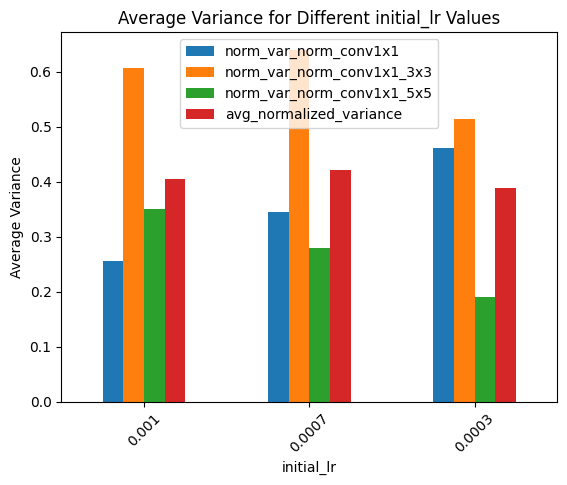

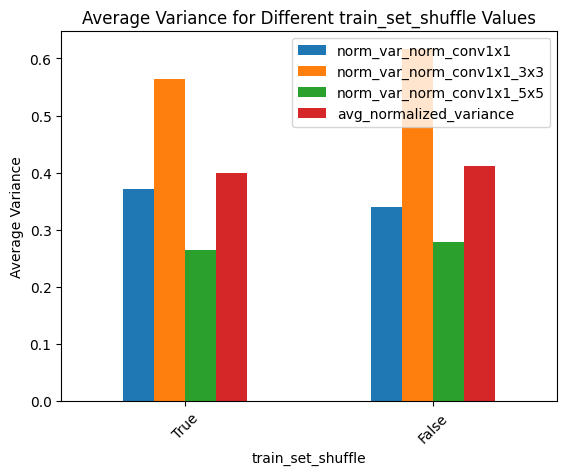

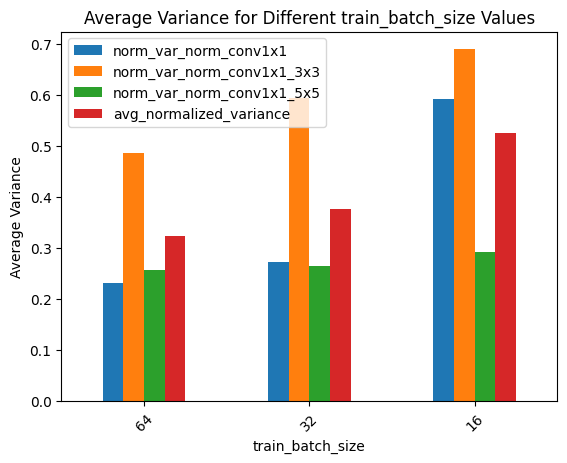

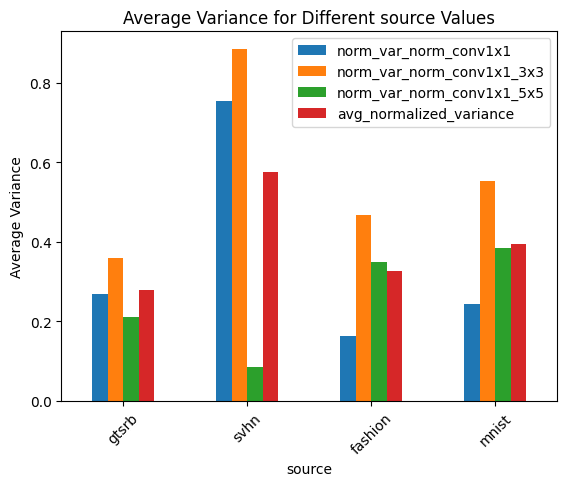

In [8]:
hyperparams_choice_list = {
    'initial_lr': [0.001, 0.0007, 0.0003],
    'train_set_shuffle': [True,False],
    'train_batch_size': [64, 32, 16],
    'source':['gtsrb','svhn', 'fashion', 'mnist']
}
for hyperparam, variables in hyperparams_choice_list.items():
    plot_variance_for_multiple_hyperparam_values(combined_df, hyperparam, variables)

# T test

In [9]:
def perform_t_test(df, target_column, condition_column, choice1, choice2):
    # Splitting the data into two groups based on the condition
    group1 = df[df[condition_column] == choice1][target_column]
    group2 = df[df[condition_column] == choice2][target_column]

    # Performing the independent t-test
    t_statistic, p_value = ttest_ind(group1, group2)

    return t_statistic, p_value

initial_lr

In [10]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0007)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -0.3703067238387923 P-value: 0.7132100926048


In [11]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0003)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 0.22950356385951604 P-value: 0.8197084123547382


In [12]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.0007, 0.0003)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 0.44231593029395894 P-value: 0.6606431104130512


train_set_shuffle

In [13]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_set_shuffle', True, False)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -0.23868676639501774 P-value: 0.8121756003854315


train_batch_size

In [14]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 64, 32)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -2.351524557215713 P-value: 0.023709570180584057


In [15]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 64, 16)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -2.9095016729387466 P-value: 0.006020155607355309


In [16]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 32, 16)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -2.107389231065037 P-value: 0.041738350923521954


dataset

In [17]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'fashion', 'mnist')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -3.70852632504655 P-value: 0.0007401928339593327


In [18]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'svhn', 'fashion')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 3.2751457886745245 P-value: 0.0025410334034017107


In [19]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'svhn', 'mnist')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 2.3548358029745784 P-value: 0.024829421307603242


# Paired T test

In [20]:
def one_sided_paired_ttest(data_set1, data_set2):
    """
    Perform a one-sided paired t-test to determine if the first data set is statistically larger than the second.

    Parameters:
    data_set1 (array-like): The first set of data.
    data_set2 (array-like): The second set of data.

    Returns:
    tuple: A tuple containing the t-statistic and the one-sided p-value.
    """
    t_statistic, p_value = ttest_rel(data_set1, data_set2)

    # Adjust p-value for one-sided test
    if t_statistic > 0:
        p_value_one_sided = p_value / 2
    else:
        p_value_one_sided = 1 - (p_value / 2)

    return t_statistic, p_value_one_sided

# Example usage:
# t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
# print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)


In [21]:
def find_rows_with_fixed_conditions(df, conditions):
    # Filter the DataFrame based on the conditions
    filtered_df = df
    for column, value in conditions.items():
        filtered_df = filtered_df[filtered_df[column] == value]

    return filtered_df

In [22]:
def generate_hyperparameter_combinations(hyperparams):
    """
    Generate a sequence of hyperparameter combinations.

    :param hyperparams: A dictionary where keys are the names of hyperparameters,
                        and values are lists of possible choices for each hyperparameter.
    :return: A list of dictionaries, each representing a unique combination of hyperparameters.
    """
    # Extract the hyperparameter names and their corresponding choices
    keys, values = zip(*hyperparams.items())

    # Generate all possible combinations of hyperparameter values
    all_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    return all_combinations

In [23]:
def get_all_pairs(df, hyperparams_choice_list, target_column, condition_column, choice1, choice2):
    hyperparams_choice_list_compressed = {key: value for key, value in hyperparams_choice_list.items() if key != condition_column}
    all_combinations = generate_hyperparameter_combinations(hyperparams_choice_list_compressed)
    choice1_target_values=[]
    choice2_target_values=[]
    for conditions in all_combinations:
      x = find_rows_with_fixed_conditions(df, conditions)
      try:
        choice1_value = float(x[x[condition_column] == choice1][target_column])
        choice2_value = float(x[x[condition_column] == choice2][target_column])
        print(choice1_value, choice2_value)
      except:
        continue
      choice1_target_values.append(choice1_value)
      choice2_target_values.append(choice2_value)
    return choice1_target_values, choice2_target_values

initial_lr

In [24]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0007)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.2984896514713195 0.2650796771319082
0.4320649838461665 0.3513948565812155
0.3085399711360017 0.292369081364779
0.3974869089652837 0.3837562054537587
0.3290358237913724 0.2876380307192348
0.5237415763332262 0.4791771648394358
0.3661076518036562 0.352223549484654
0.4265649700728846 0.4211555550598589
0.340976975267695 0.3315124904404577
0.3946883551555258 0.3776961738837398
0.4897063811121115 0.4146805301643829
0.4226619822455268 0.3494397065214991
0.3009591430358357 0.2715428616540795
0.3736632661712156 0.3746780711473878
0.5839376469055495 0.4339473077932005
0.3592922443817537 0.342168723431931
0.4131290461204873 0.3896225121617806
0.3978410694368748 0.3779961373907751
0.5233798500422175 0.5037418300486232
T-statistic: 4.30197680017413 One-sided P-value: 0.00021460598253462583


In [25]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.0007, 0.0003)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.2650796771319082 0.2079474396127136
0.3513948565812155 0.3513964830380789
0.292369081364779 0.2480924817841386
0.3837562054537587 0.3276670779923408
0.2876380307192348 0.2218030113494227
0.4791771648394358 0.3929481987390232
0.352223549484654 0.301492213847932
0.4211555550598589 0.3326320090828056
0.3315124904404577 0.2344947930446539
1.1011471524402914 1.345457055079862
0.3776961738837398 0.3327604212426039
0.4146805301643829 0.3280620401069132
0.3494397065214991 0.2938911621971673
0.2715428616540795 0.2487039476620983
0.3746780711473878 0.3083814913920928
0.4339473077932005 0.3367102886042998
0.342168723431931 0.2948733681887151
0.3896225121617806 0.3281439715040244
0.7504934523102963 1.0616427069478451
0.3779961373907751 0.3054301901917635
0.5037418300486232 0.3687275826517866
T-statistic: 1.3813731704130472 One-sided P-value: 0.09120175843196458


In [26]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0003)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.2984896514713195 0.2079474396127136
0.4320649838461665 0.3513964830380789
0.3085399711360017 0.2480924817841386
0.3974869089652837 0.3276670779923408
0.3290358237913724 0.2218030113494227
0.5237415763332262 0.3929481987390232
0.3661076518036562 0.301492213847932
0.4265649700728846 0.3326320090828056
0.340976975267695 0.2344947930446539
0.3946883551555258 0.3327604212426039
0.4897063811121115 0.3280620401069132
0.4226619822455268 0.2938911621971673
0.3009591430358357 0.2487039476620983
0.3736632661712156 0.3083814913920928
0.5839376469055495 0.3367102886042998
0.3592922443817537 0.2948733681887151
0.4131290461204873 0.3281439715040244
0.3978410694368748 0.3054301901917635
0.5233798500422175 0.3687275826517866
T-statistic: 9.217222669487333 One-sided P-value: 1.541767985370361e-08


train_set_shuffle

In [27]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_set_shuffle', True, False)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.4320649838461665 0.4226619822455268
0.3085399711360017 0.3009591430358357
0.3974869089652837 0.3736632661712156
0.5237415763332262 0.5839376469055495
0.3661076518036562 0.3592922443817537
0.4265649700728846 0.4131290461204873
0.3946883551555258 0.3978410694368748
0.4897063811121115 0.5233798500422175
0.3513948565812155 0.3494397065214991
0.292369081364779 0.2715428616540795
0.3837562054537587 0.3746780711473878
0.4791771648394358 0.4339473077932005
0.352223549484654 0.342168723431931
0.4211555550598589 0.3896225121617806
1.1011471524402914 0.7504934523102963
0.3776961738837398 0.3779961373907751
0.4146805301643829 0.5037418300486232
0.3513964830380789 0.2938911621971673
0.2480924817841386 0.2487039476620983
0.3276670779923408 0.3083814913920928
0.3929481987390232 0.3367102886042998
0.301492213847932 0.2948733681887151
0.3326320090828056 0.3281439715040244
1.345457055079862 1.0616427069478451
0.3327604212426039 0.3054301901917635
0.3280620401069132 0.3687275826517866
T-statistic: 1.62

train_batch_size

In [28]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 32, 64)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.3290358237913724 0.2984896514713195
0.5237415763332262 0.4320649838461665
0.3661076518036562 0.3085399711360017
0.4265649700728846 0.3974869089652837
0.5839376469055495 0.4226619822455268
0.3592922443817537 0.3009591430358357
0.4131290461204873 0.3736632661712156
0.2876380307192348 0.2650796771319082
0.4791771648394358 0.3513948565812155
0.352223549484654 0.292369081364779
0.4211555550598589 0.3837562054537587
0.4339473077932005 0.3494397065214991
0.342168723431931 0.2715428616540795
0.3896225121617806 0.3746780711473878
0.2218030113494227 0.2079474396127136
0.3929481987390232 0.3513964830380789
0.301492213847932 0.2480924817841386
0.3326320090828056 0.3276670779923408
0.3367102886042998 0.2938911621971673
0.2948733681887151 0.2487039476620983
0.3281439715040244 0.3083814913920928
T-statistic: 6.316256189085332 One-sided P-value: 1.8203757395346423e-06


In [29]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 16, 32)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.340976975267695 0.3290358237913724
0.3946883551555258 0.3661076518036562
0.4897063811121115 0.4265649700728846
0.3978410694368748 0.3592922443817537
0.5233798500422175 0.4131290461204873
0.3315124904404577 0.2876380307192348
1.1011471524402914 0.4791771648394358
0.3776961738837398 0.352223549484654
0.4146805301643829 0.4211555550598589
0.7504934523102963 0.4339473077932005
0.3779961373907751 0.342168723431931
0.5037418300486232 0.3896225121617806
0.2344947930446539 0.2218030113494227
1.345457055079862 0.3929481987390232
0.3327604212426039 0.301492213847932
0.3280620401069132 0.3326320090828056
1.0616427069478451 0.3367102886042998
0.3054301901917635 0.2948733681887151
0.3687275826517866 0.3281439715040244
T-statistic: 2.5827115392453353 One-sided P-value: 0.009384342619335167


In [30]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 16, 64)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.340976975267695 0.2984896514713195
0.3946883551555258 0.3085399711360017
0.4897063811121115 0.3974869089652837
0.3978410694368748 0.3009591430358357
0.5233798500422175 0.3736632661712156
0.3315124904404577 0.2650796771319082
1.1011471524402914 0.3513948565812155
0.3776961738837398 0.292369081364779
0.4146805301643829 0.3837562054537587
0.7504934523102963 0.3494397065214991
0.3779961373907751 0.2715428616540795
0.5037418300486232 0.3746780711473878
0.2344947930446539 0.2079474396127136
1.345457055079862 0.3513964830380789
0.3327604212426039 0.2480924817841386
0.3280620401069132 0.3276670779923408
1.0616427069478451 0.2938911621971673
0.3054301901917635 0.2487039476620983
0.3687275826517866 0.3083814913920928
T-statistic: 3.1462463657034854 One-sided P-value: 0.0027920555068486107


dataset

In [31]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'mnist','fashion')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.3974869089652837 0.3085399711360017
0.4265649700728846 0.3661076518036562
0.4897063811121115 0.3946883551555258
0.3736632661712156 0.3009591430358357
0.4131290461204873 0.3592922443817537
0.5233798500422175 0.3978410694368748
0.3837562054537587 0.292369081364779
0.4211555550598589 0.352223549484654
0.4146805301643829 0.3776961738837398
0.3746780711473878 0.2715428616540795
0.3896225121617806 0.342168723431931
0.5037418300486232 0.3779961373907751
0.3276670779923408 0.2480924817841386
0.3326320090828056 0.301492213847932
0.3280620401069132 0.3327604212426039
0.3083814913920928 0.2487039476620983
0.3281439715040244 0.2948733681887151
0.3687275826517866 0.3054301901917635
T-statistic: 8.614088956673587 One-sided P-value: 6.572805738543173e-08


In [32]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source', 'fashion', 'svhn')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.3085399711360017 0.4320649838461665
0.3661076518036562 0.5237415763332262
0.3009591430358357 0.4226619822455268
0.3592922443817537 0.5839376469055495
0.292369081364779 0.3513948565812155
0.352223549484654 0.4791771648394358
0.3776961738837398 1.1011471524402914
0.2715428616540795 0.3494397065214991
0.342168723431931 0.4339473077932005
0.3779961373907751 0.7504934523102963
0.2480924817841386 0.3513964830380789
0.301492213847932 0.3929481987390232
0.3327604212426039 1.345457055079862
0.2487039476620983 0.2938911621971673
0.2948733681887151 0.3367102886042998
0.3054301901917635 1.0616427069478451
T-statistic: -3.4340107485819265 One-sided P-value: 0.9981545078153592


In [33]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'mnist', 'svhn')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.3974869089652837 0.4320649838461665
0.4265649700728846 0.5237415763332262
0.3736632661712156 0.4226619822455268
0.4131290461204873 0.5839376469055495
0.3837562054537587 0.3513948565812155
0.4211555550598589 0.4791771648394358
0.4146805301643829 1.1011471524402914
0.3746780711473878 0.3494397065214991
0.3896225121617806 0.4339473077932005
0.5037418300486232 0.7504934523102963
0.3276670779923408 0.3513964830380789
0.3326320090828056 0.3929481987390232
0.3280620401069132 1.345457055079862
0.3083814913920928 0.2938911621971673
0.3281439715040244 0.3367102886042998
0.3687275826517866 1.0616427069478451
T-statistic: -2.470355717704498 One-sided P-value: 0.987009822674266


In [34]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'mnist', 'gtsrb')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.3974869089652837 0.2984896514713195
0.4265649700728846 0.3290358237913724
0.4897063811121115 0.340976975267695
0.3837562054537587 0.2650796771319082
0.4211555550598589 0.2876380307192348
0.4146805301643829 0.3315124904404577
0.3276670779923408 0.2079474396127136
0.3326320090828056 0.2218030113494227
0.3280620401069132 0.2344947930446539
T-statistic: 16.09031913781267 One-sided P-value: 1.1170661075979182e-07


In [35]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'fashion', 'gtsrb')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.3085399711360017 0.2984896514713195
0.3661076518036562 0.3290358237913724
0.3946883551555258 0.340976975267695
0.292369081364779 0.2650796771319082
0.352223549484654 0.2876380307192348
0.3776961738837398 0.3315124904404577
0.2480924817841386 0.2079474396127136
0.301492213847932 0.2218030113494227
0.3327604212426039 0.2344947930446539
T-statistic: 5.646395210171646 One-sided P-value: 0.0002417203933528472


In [36]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'svhn', 'gtsrb')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.4320649838461665 0.2984896514713195
0.5237415763332262 0.3290358237913724
0.3513948565812155 0.2650796771319082
0.4791771648394358 0.2876380307192348
1.1011471524402914 0.3315124904404577
0.3513964830380789 0.2079474396127136
0.3929481987390232 0.2218030113494227
1.345457055079862 0.2344947930446539
T-statistic: 2.626443030118964 One-sided P-value: 0.017044192848490316
